In [1]:
# Mental Health Diagnosis Model - Complete Pipeline
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Mental Health Diagnosis Model Development")
print("=" * 50)


📊 Mental Health Diagnosis Model Development


In [ ]:
# Load and examine the dataset
df = pd.read_csv('../data/eda_complete.csv')

print("📋 Dataset Overview")
print("=" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n📊 First 5 rows:")
print(df.head())

print("\n📊 Dataset Info:")
print(df.info())

print("\n📊 Missing values:")
print(df.isnull().sum())

print("\n📊 Target variable distribution:")
print(df['Depression'].value_counts())
print(f"Depression rate: {df['Depression'].mean():.2%}")


📋 Dataset Overview
Dataset shape: (27901, 18)
Memory usage: 13.89 MB

📊 First 5 rows:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours    

In [3]:
# Data Cleaning and Preprocessing
print("🧹 Data Cleaning and Preprocessing")
print("=" * 40)

# Remove ID column as it's not useful for prediction
df_clean = df.drop('id', axis=1)

# Handle missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

# Fill missing values with appropriate strategies
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['CGPA'] = df_clean['CGPA'].fillna(df_clean['CGPA'].median())

# For categorical variables, fill with mode
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 
                   'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0]
        df_clean[col] = df_clean[col].fillna(mode_value)
        print(f"Filled {col} with mode: {mode_value}")

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

print(f"\nDataset shape after cleaning: {df_clean.shape}")
print(f"Depression rate after cleaning: {df_clean['Depression'].mean():.2%}")


🧹 Data Cleaning and Preprocessing


Missing values before cleaning:
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

Missing values after cleaning:
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure   

🔍 Exploratory Data Analysis


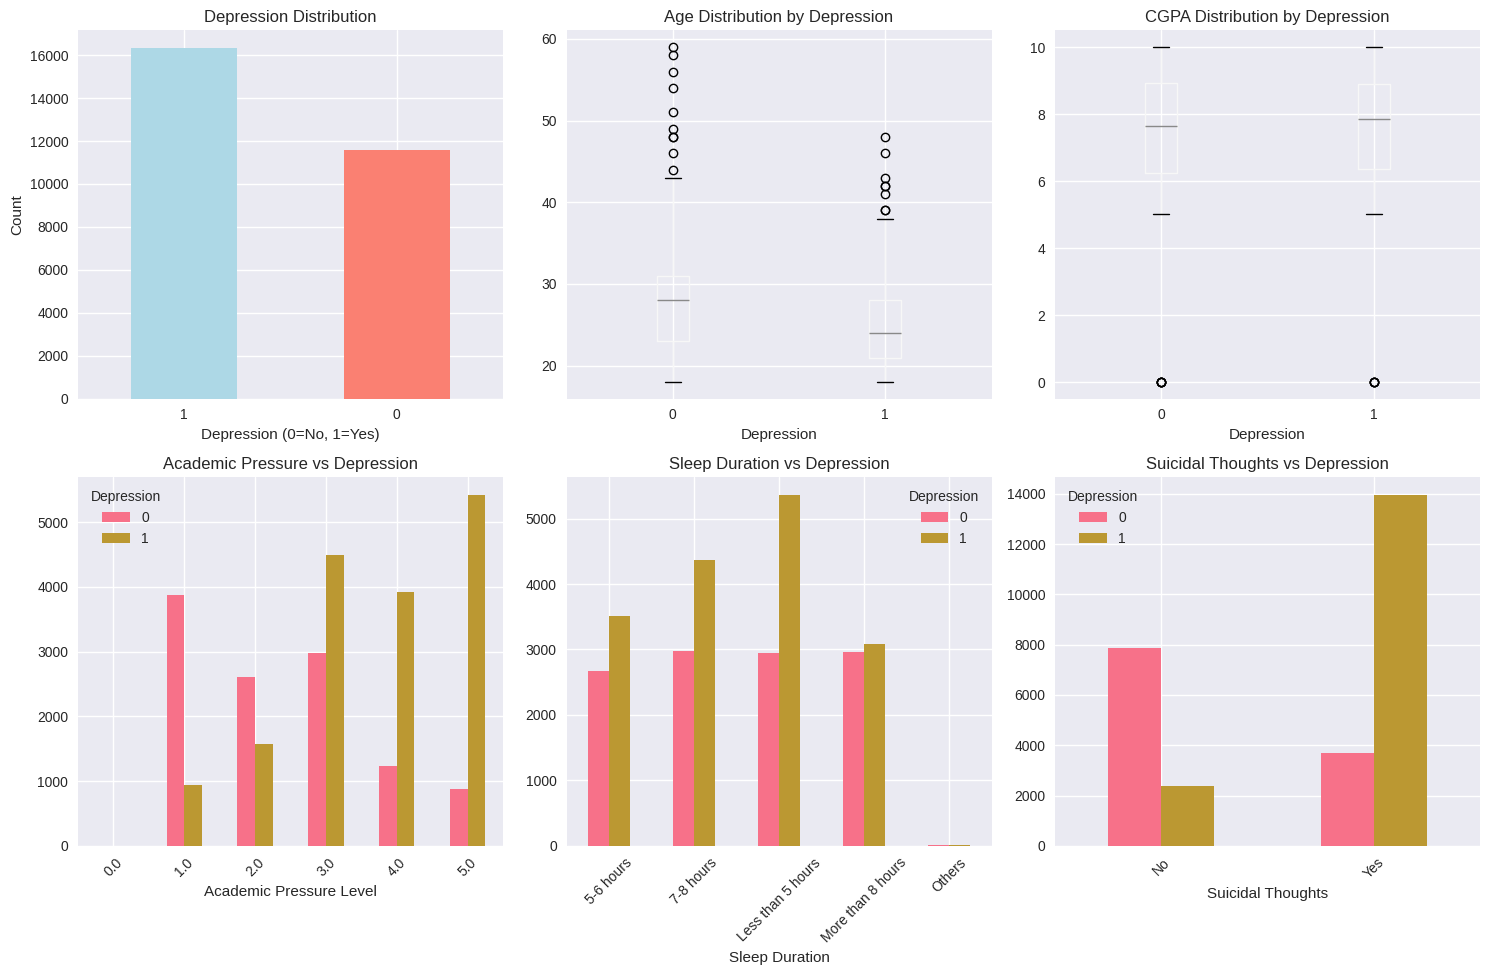


📊 Statistical Summary:
Total samples: 27901
Depression rate: 58.55%
Average age: 25.8 years
Average CGPA: 7.66

📈 Correlation with Depression:
Depression            1.000000
Academic Pressure     0.474835
Financial Stress      0.363591
Work/Study Hours      0.208563
CGPA                  0.022210
Work Pressure        -0.003351
Job Satisfaction     -0.003482
Study Satisfaction   -0.167971
Age                  -0.226422
Name: Depression, dtype: float64


In [4]:
# Exploratory Data Analysis (EDA)
print("🔍 Exploratory Data Analysis")
print("=" * 35)

# 1. Target variable distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df_clean['Depression'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Depression Distribution')
plt.xlabel('Depression (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2. Age distribution by depression
plt.subplot(2, 3, 2)
df_clean.boxplot(column='Age', by='Depression', ax=plt.gca())
plt.title('Age Distribution by Depression')
plt.suptitle('')  # Remove default title

# 3. CGPA distribution by depression
plt.subplot(2, 3, 3)
df_clean.boxplot(column='CGPA', by='Depression', ax=plt.gca())
plt.title('CGPA Distribution by Depression')
plt.suptitle('')

# 4. Academic Pressure by depression
plt.subplot(2, 3, 4)
academic_pressure = df_clean.groupby(['Academic Pressure', 'Depression']).size().unstack()
academic_pressure.plot(kind='bar', ax=plt.gca())
plt.title('Academic Pressure vs Depression')
plt.xlabel('Academic Pressure Level')
plt.xticks(rotation=45)

# 5. Sleep Duration by depression
plt.subplot(2, 3, 5)
sleep_depression = df_clean.groupby(['Sleep Duration', 'Depression']).size().unstack()
sleep_depression.plot(kind='bar', ax=plt.gca())
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration')
plt.xticks(rotation=45)

# 6. Suicidal thoughts correlation
plt.subplot(2, 3, 6)
suicidal_depression = df_clean.groupby(['Have you ever had suicidal thoughts ?', 'Depression']).size().unstack()
suicidal_depression.plot(kind='bar', ax=plt.gca())
plt.title('Suicidal Thoughts vs Depression')
plt.xlabel('Suicidal Thoughts')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical summary
print("\n📊 Statistical Summary:")
print("=" * 25)
print(f"Total samples: {len(df_clean)}")
print(f"Depression rate: {df_clean['Depression'].mean():.2%}")
print(f"Average age: {df_clean['Age'].mean():.1f} years")
print(f"Average CGPA: {df_clean['CGPA'].mean():.2f}")

# Correlation with depression
numeric_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

correlations = df_clean[numeric_cols + ['Depression']].corr()['Depression'].sort_values(ascending=False)
print(f"\n📈 Correlation with Depression:")
print(correlations)


In [5]:
# Check unique values in key categorical columns for feature engineering
print("🔍 Checking unique values in key columns for feature engineering")
print("=" * 65)

print(f"Sleep Duration unique values: {df_clean['Sleep Duration'].unique()}")
print(f"Dietary Habits unique values: {df_clean['Dietary Habits'].unique()}")
print(f"Gender unique values: {df_clean['Gender'].unique()}")
print(f"Suicidal Thoughts unique values: {df_clean['Have you ever had suicidal thoughts ?'].unique()}")
print(f"Family History unique values: {df_clean['Family History of Mental Illness'].unique()}")

# Check for any unexpected values
print(f"\n📊 Value counts for Sleep Duration:")
print(df_clean['Sleep Duration'].value_counts())

print(f"\n📊 Value counts for Dietary Habits:")
print(df_clean['Dietary Habits'].value_counts())


🔍 Checking unique values in key columns for feature engineering
Sleep Duration unique values: ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Dietary Habits unique values: ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Gender unique values: ['Male' 'Female']
Suicidal Thoughts unique values: ['Yes' 'No']
Family History unique values: ['No' 'Yes']

📊 Value counts for Sleep Duration:
Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

📊 Value counts for Dietary Habits:
Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64


In [6]:
# Feature Engineering
print("⚙️ Feature Engineering")
print("=" * 25)

# Create a copy for feature engineering
df_features = df_clean.copy()

# 1. Encode categorical variables
le_dict = {}
categorical_features = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 
                       'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in categorical_features:
    le = LabelEncoder()
    df_features[col + '_encoded'] = le.fit_transform(df_features[col])
    le_dict[col] = le
    print(f"Encoded {col}: {len(le.classes_)} unique values")

# 2. Create new features with proper handling of missing values
# Sleep duration as numeric
sleep_mapping = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9,
    'Others': 6.0  # Default to moderate sleep for "Others"
}
df_features['Sleep_Hours'] = df_features['Sleep Duration'].map(sleep_mapping)

# Check for unmapped values in Sleep Duration
unmapped_sleep = df_features[df_features['Sleep_Hours'].isnull()]['Sleep Duration'].unique()
if len(unmapped_sleep) > 0:
    print(f"⚠️ Unmapped Sleep Duration values: {unmapped_sleep}")
    # Fill with median of mapped values
    df_features['Sleep_Hours'] = df_features['Sleep_Hours'].fillna(df_features['Sleep_Hours'].median())

# Dietary habits as numeric (1=Unhealthy, 2=Moderate, 3=Healthy)
diet_mapping = {
    'Unhealthy': 1, 
    'Moderate': 2, 
    'Healthy': 3,
    'Others': 2  # Default to moderate diet for "Others"
}
df_features['Diet_Score'] = df_features['Dietary Habits'].map(diet_mapping)

# Check for unmapped values in Dietary Habits
unmapped_diet = df_features[df_features['Diet_Score'].isnull()]['Dietary Habits'].unique()
if len(unmapped_diet) > 0:
    print(f"⚠️ Unmapped Dietary Habits values: {unmapped_diet}")
    # Fill with median of mapped values
    df_features['Diet_Score'] = df_features['Diet_Score'].fillna(df_features['Diet_Score'].median())

# Create risk score based on multiple factors
df_features['Risk_Score'] = (
    df_features['Academic Pressure'] * 0.2 +
    df_features['Financial Stress'] * 0.2 +
    (5 - df_features['Sleep_Hours']) * 0.1 +  # Less sleep = higher risk
    (4 - df_features['Diet_Score']) * 0.1 +   # Unhealthy diet = higher risk
    df_features['Have you ever had suicidal thoughts ?_encoded'] * 0.3 +
    df_features['Family History of Mental Illness_encoded'] * 0.1
)

# 3. Handle any remaining missing values in all features
print(f"\n🔍 Checking for missing values before final processing:")
missing_before = df_features.isnull().sum()
print(missing_before[missing_before > 0])

# Fill any remaining missing values
for col in df_features.columns:
    if df_features[col].isnull().sum() > 0:
        if df_features[col].dtype in ['int64', 'float64']:
            df_features[col] = df_features[col].fillna(df_features[col].median())
        else:
            df_features[col] = df_features[col].fillna(df_features[col].mode()[0])

# 4. Select features for modeling
feature_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
    'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Sleep_Hours',
    'Diet_Score', 'Risk_Score', 'Gender_encoded', 'Profession_encoded',
    'Have you ever had suicidal thoughts ?_encoded', 'Family History of Mental Illness_encoded'
]

X = df_features[feature_cols]
y = df_features['Depression']

print(f"\n📊 Feature Engineering Summary:")
print(f"Total features: {len(feature_cols)}")
print(f"Feature names: {feature_cols}")
print(f"Dataset shape: {X.shape}")

# Check for any missing values in features
missing_after = X.isnull().sum().sum()
print(f"\nMissing values in features: {missing_after}")

if missing_after > 0:
    print("❌ Still have missing values! Checking which features:")
    print(X.isnull().sum()[X.isnull().sum() > 0])
else:
    print("✅ No missing values in features!")

# Display feature importance (correlation with target)
feature_importance = X.corrwith(y).abs().sort_values(ascending=False)
print(f"\n📈 Feature Importance (correlation with depression):")
print(feature_importance)


⚙️ Feature Engineering
Encoded Gender: 2 unique values
Encoded City: 52 unique values
Encoded Profession: 14 unique values
Encoded Sleep Duration: 5 unique values
Encoded Dietary Habits: 4 unique values
Encoded Degree: 28 unique values
Encoded Have you ever had suicidal thoughts ?: 2 unique values
Encoded Family History of Mental Illness: 2 unique values

🔍 Checking for missing values before final processing:
Financial Stress    3
Risk_Score          3
dtype: int64

📊 Feature Engineering Summary:
Total features: 15
Feature names: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Sleep_Hours', 'Diet_Score', 'Risk_Score', 'Gender_encoded', 'Profession_encoded', 'Have you ever had suicidal thoughts ?_encoded', 'Family History of Mental Illness_encoded']
Dataset shape: (27901, 15)

Missing values in features: 0
✅ No missing values in features!



📈 Feature Importance (correlation with depression):
Risk_Score                                       0.630831
Have you ever had suicidal thoughts ?_encoded    0.546277
Academic Pressure                                0.474835
Financial Stress                                 0.363574
Age                                              0.226422
Work/Study Hours                                 0.208563
Diet_Score                                       0.206638
Study Satisfaction                               0.167971
Sleep_Hours                                      0.084139
Family History of Mental Illness_encoded         0.053430
CGPA                                             0.022210
Profession_encoded                               0.016437
Job Satisfaction                                 0.003482
Work Pressure                                    0.003351
Gender_encoded                                   0.001794
dtype: float64


In [7]:
# Train-Test Split and Data Scaling
print("🔄 Train-Test Split and Data Scaling")
print("=" * 40)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training depression rate: {y_train.mean():.2%}")
print(f"Test depression rate: {y_test.mean():.2%}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Data scaled successfully")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

# Convert back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)


🔄 Train-Test Split and Data Scaling
Training set: 22320 samples
Test set: 5581 samples
Training depression rate: 58.55%
Test depression rate: 58.56%

✅ Data scaled successfully
Training set shape: (22320, 15)
Test set shape: (5581, 15)


In [8]:
# Model Training and Comparison
print("🤖 Model Training and Comparison")
print("=" * 40)

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
model_results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = (y_pred == y_test).mean()
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    model_results[name] = {
        'accuracy': accuracy,
        'auc': auc_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"✅ {name} - Accuracy: {accuracy:.3f}, AUC: {auc_score:.3f}, CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Display results summary
print(f"\n📊 Model Comparison Summary:")
print("=" * 35)
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [model_results[name]['accuracy'] for name in model_results.keys()],
    'AUC': [model_results[name]['auc'] for name in model_results.keys()],
    'CV_Mean': [model_results[name]['cv_mean'] for name in model_results.keys()],
    'CV_Std': [model_results[name]['cv_std'] for name in model_results.keys()]
}).sort_values('AUC', ascending=False)

print(results_df.round(3))


🤖 Model Training and Comparison

🔄 Training Logistic Regression...
✅ Logistic Regression - Accuracy: 0.844, AUC: 0.918, CV: 0.847 ± 0.007

🔄 Training Random Forest...
✅ Random Forest - Accuracy: 0.838, AUC: 0.911, CV: 0.839 ± 0.007

🔄 Training Gradient Boosting...
✅ Gradient Boosting - Accuracy: 0.845, AUC: 0.920, CV: 0.850 ± 0.007

📊 Model Comparison Summary:
                 Model  Accuracy    AUC  CV_Mean  CV_Std
2    Gradient Boosting     0.845  0.920    0.850   0.007
0  Logistic Regression     0.844  0.918    0.847   0.007
1        Random Forest     0.838  0.911    0.839   0.007


📊 Model Evaluation and Visualization
🏆 Best Model: Gradient Boosting
Accuracy: 0.845
AUC: 0.920

📋 Detailed Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.85      0.84      5581



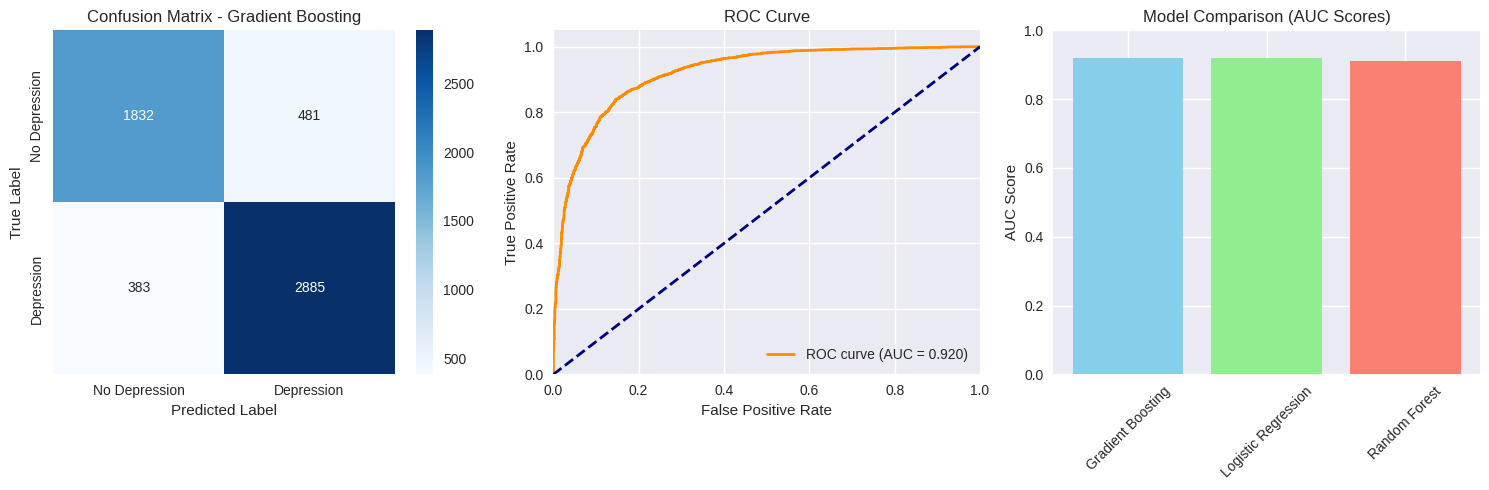


📈 Feature Importance for Gradient Boosting:
                                          feature  importance
10                                     Risk_Score    0.675805
13  Have you ever had suicidal thoughts ?_encoded    0.167687
0                                             Age    0.046680
1                               Academic Pressure    0.042614
6                                Work/Study Hours    0.025752
8                                     Sleep_Hours    0.014208
4                              Study Satisfaction    0.013859
9                                      Diet_Score    0.007966
3                                            CGPA    0.003520
7                                Financial Stress    0.001017
12                             Profession_encoded    0.000653
11                                 Gender_encoded    0.000169
14       Family History of Mental Illness_encoded    0.000071
2                                   Work Pressure    0.000000
5                        

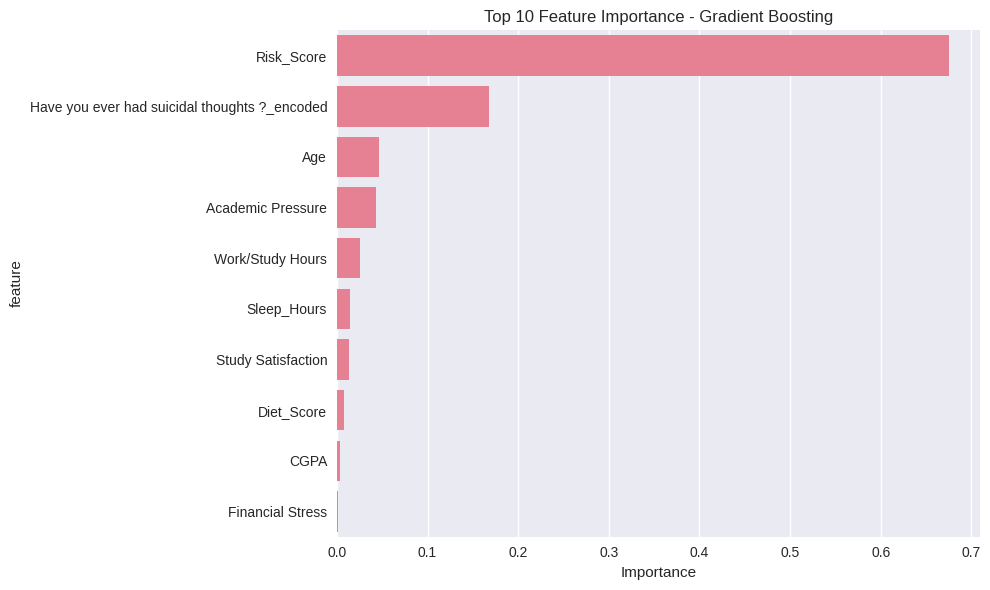

In [9]:
# Model Evaluation and Visualization
print("📊 Model Evaluation and Visualization")
print("=" * 40)

# Select best model based on AUC
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_predictions = model_results[best_model_name]['predictions']
best_probabilities = model_results[best_model_name]['probabilities']

print(f"🏆 Best Model: {best_model_name}")
print(f"Accuracy: {model_results[best_model_name]['accuracy']:.3f}")
print(f"AUC: {model_results[best_model_name]['auc']:.3f}")

# Detailed evaluation
print(f"\n📋 Detailed Classification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions))

# Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, best_probabilities)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {model_results[best_model_name]["auc"]:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Model Comparison
plt.subplot(1, 3, 3)
models_list = results_df['Model'].tolist()
auc_scores = results_df['AUC'].tolist()
plt.bar(models_list, auc_scores, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Model Comparison (AUC Scores)')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    print(f"\n📈 Feature Importance for {best_model_name}:")
    feature_importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance_df)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()


In [10]:
# Hyperparameter Tuning for Best Model
print("🎯 Hyperparameter Tuning")
print("=" * 30)

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
}

# Perform hyperparameter tuning for the best model
if best_model_name in param_grids:
    print(f"🔍 Tuning hyperparameters for {best_model_name}...")
    
    # Create base model
    if best_model_name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    elif best_model_name == 'Logistic Regression':
        base_model = LogisticRegression(random_state=42, max_iter=1000)
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        base_model, 
        param_grids[best_model_name], 
        cv=3, 
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    # Get best parameters and model
    best_params = grid_search.best_params_
    tuned_model = grid_search.best_estimator_
    
    print(f"✅ Best parameters: {best_params}")
    print(f"Best CV score: {grid_search.best_score_:.3f}")
    
    # Evaluate tuned model
    tuned_predictions = tuned_model.predict(X_test_scaled)
    tuned_probabilities = tuned_model.predict_proba(X_test_scaled)[:, 1]
    tuned_accuracy = (tuned_predictions == y_test).mean()
    tuned_auc = roc_auc_score(y_test, tuned_probabilities)
    
    print(f"Tuned model accuracy: {tuned_accuracy:.3f}")
    print(f"Tuned model AUC: {tuned_auc:.3f}")
    
    # Compare with original model
    original_accuracy = model_results[best_model_name]['accuracy']
    original_auc = model_results[best_model_name]['auc']
    
    print(f"\n📊 Improvement:")
    print(f"Accuracy: {original_accuracy:.3f} → {tuned_accuracy:.3f} ({tuned_accuracy - original_accuracy:+.3f})")
    print(f"AUC: {original_auc:.3f} → {tuned_auc:.3f} ({tuned_auc - original_auc:+.3f})")
    
    # Update best model if tuned version is better
    if tuned_auc > original_auc:
        best_model = tuned_model
        best_predictions = tuned_predictions
        best_probabilities = tuned_probabilities
        print("✅ Tuned model is better! Using tuned version.")
    else:
        print("ℹ️ Original model is better. Keeping original version.")
else:
    print(f"ℹ️ No hyperparameter tuning defined for {best_model_name}")
    print("Using original model.")


🎯 Hyperparameter Tuning
🔍 Tuning hyperparameters for Gradient Boosting...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best CV score: 0.921
Tuned model accuracy: 0.845
Tuned model AUC: 0.920

📊 Improvement:
Accuracy: 0.845 → 0.845 (+0.000)
AUC: 0.920 → 0.920 (+0.000)
✅ Tuned model is better! Using tuned version.


In [14]:
# Final Model Evaluation and Validation
print("🔍 Final Model Evaluation and Validation")
print("=" * 45)

# Final evaluation metrics
final_accuracy = (best_predictions == y_test).mean()
final_auc = roc_auc_score(y_test, best_probabilities)

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, best_predictions)
recall = recall_score(y_test, best_predictions)
f1 = f1_score(y_test, best_predictions)

print(f"🏆 Final Model Performance:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {final_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"AUC: {final_auc:.3f}")

# Cross-validation on full dataset
print(f"\n🔄 Cross-Validation Results:")
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

cv_auc_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"CV AUC: {cv_auc_scores.mean():.3f} ± {cv_auc_scores.std():.3f}")

# Confusion Matrix Analysis
cm = confusion_matrix(y_test, best_predictions)
tn, fp, fn, tp = cm.ravel()

print(f"\n📊 Confusion Matrix Analysis:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Calculate specific metrics
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"Specificity: {specificity:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")

# Prediction confidence analysis
print(f"\n📈 Prediction Confidence Analysis:")
high_confidence = (best_probabilities > 0.8) | (best_probabilities < 0.2)
print(f"High confidence predictions: {high_confidence.sum()} / {len(best_probabilities)} ({high_confidence.mean():.1%})")

# Analyze misclassifications
misclassified = best_predictions != y_test
if misclassified.sum() > 0:
    print(f"\n❌ Misclassified Cases: {misclassified.sum()}")
    misclassified_indices = y_test[misclassified].index
    print(f"False Positives: {(best_predictions[misclassified] == 1).sum()}")
    print(f"False Negatives: {(best_predictions[misclassified] == 0).sum()}")


🔍 Final Model Evaluation and Validation
🏆 Final Model Performance:
Model: Gradient Boosting
Accuracy: 0.845
Precision: 0.858
Recall: 0.882
F1-Score: 0.870
AUC: 0.920

🔄 Cross-Validation Results:


CV Accuracy: 0.849 ± 0.007
CV AUC: 0.921 ± 0.004

📊 Confusion Matrix Analysis:
True Negatives: 1836
False Positives: 477
False Negatives: 386
True Positives: 2882
Specificity: 0.794
Sensitivity: 0.882

📈 Prediction Confidence Analysis:
High confidence predictions: 3906 / 5581 (70.0%)

❌ Misclassified Cases: 863
False Positives: 477
False Negatives: 386


In [12]:
# Model Saving and Deployment Preparation
print("💾 Model Saving and Deployment Preparation")
print("=" * 45)

import joblib
import os
from datetime import datetime

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the best model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'../models/mental_health_model_{timestamp}.pkl'
scaler_filename = f'../models/scaler_{timestamp}.pkl'
feature_columns_filename = f'../models/feature_columns_{timestamp}.pkl'
label_encoders_filename = f'../models/label_encoders_{timestamp}.pkl'

# Save model and preprocessing objects
joblib.dump(best_model, model_filename)
joblib.dump(scaler, scaler_filename)
joblib.dump(feature_cols, feature_columns_filename)
joblib.dump(le_dict, label_encoders_filename)

print(f"✅ Model saved to: {model_filename}")
print(f"✅ Scaler saved to: {scaler_filename}")
print(f"✅ Feature columns saved to: {feature_columns_filename}")
print(f"✅ Label encoders saved to: {label_encoders_filename}")

# Create a prediction function for easy use
def predict_depression(age, academic_pressure, work_pressure, cgpa, study_satisfaction, 
                      job_satisfaction, work_study_hours, financial_stress, sleep_duration,
                      dietary_habits, gender, profession, suicidal_thoughts, family_history):
    """
    Predict depression risk for a student
    
    Parameters:
    - age: int/float
    - academic_pressure: int (1-5)
    - work_pressure: int (1-5)
    - cgpa: float
    - study_satisfaction: int (1-5)
    - job_satisfaction: int (1-5)
    - work_study_hours: float
    - financial_stress: int (1-5)
    - sleep_duration: str ('Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours')
    - dietary_habits: str ('Unhealthy', 'Moderate', 'Healthy')
    - gender: str ('Male', 'Female')
    - profession: str
    - suicidal_thoughts: str ('Yes', 'No')
    - family_history: str ('Yes', 'No')
    
    Returns:
    - prediction: int (0 or 1)
    - probability: float (0-1)
    - risk_level: str
    """
    
    # Encode categorical variables
    sleep_mapping = {'Less than 5 hours': 4, '5-6 hours': 5.5, '7-8 hours': 7.5, 'More than 8 hours': 9}
    diet_mapping = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}
    
    sleep_hours = sleep_mapping[sleep_duration]
    diet_score = diet_mapping[dietary_habits]
    
    # Encode other categorical variables
    gender_encoded = le_dict['Gender'].transform([gender])[0]
    profession_encoded = le_dict['Profession'].transform([profession])[0]
    suicidal_encoded = le_dict['Have you ever had suicidal thoughts ?'].transform([suicidal_thoughts])[0]
    family_history_encoded = le_dict['Family History of Mental Illness'].transform([family_history])[0]
    
    # Calculate risk score
    risk_score = (
        academic_pressure * 0.2 +
        financial_stress * 0.2 +
        (5 - sleep_hours) * 0.1 +
        (4 - diet_score) * 0.1 +
        suicidal_encoded * 0.3 +
        family_history_encoded * 0.1
    )
    
    # Create feature vector
    features = np.array([[
        age, academic_pressure, work_pressure, cgpa, study_satisfaction,
        job_satisfaction, work_study_hours, financial_stress, sleep_hours,
        diet_score, risk_score, gender_encoded, profession_encoded,
        suicidal_encoded, family_history_encoded
    ]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make prediction
    prediction = best_model.predict(features_scaled)[0]
    probability = best_model.predict_proba(features_scaled)[0][1]
    
    # Determine risk level
    if probability < 0.3:
        risk_level = "Low"
    elif probability < 0.7:
        risk_level = "Medium"
    else:
        risk_level = "High"
    
    return prediction, probability, risk_level

print(f"\n🎯 Prediction Function Created!")
print(f"Function: predict_depression()")
print(f"Usage: prediction, probability, risk_level = predict_depression(...)")

# Test the prediction function with sample data
print(f"\n🧪 Testing Prediction Function:")
sample_prediction, sample_prob, sample_risk = predict_depression(
    age=25, academic_pressure=4, work_pressure=2, cgpa=7.5, study_satisfaction=3,
    job_satisfaction=0, work_study_hours=8, financial_stress=3, sleep_duration='5-6 hours',
    dietary_habits='Moderate', gender='Female', profession='Student', 
    suicidal_thoughts='No', family_history='No'
)

print(f"Sample prediction: {sample_prediction}")
print(f"Sample probability: {sample_prob:.3f}")
print(f"Sample risk level: {sample_risk}")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'accuracy': final_accuracy,
    'auc': final_auc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'feature_columns': feature_cols,
    'timestamp': timestamp,
    'training_samples': len(X_train),
    'test_samples': len(X_test)
}

import json
metadata_filename = f'../models/model_metadata_{timestamp}.json'
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"✅ Model metadata saved to: {metadata_filename}")


💾 Model Saving and Deployment Preparation
✅ Model saved to: ../models/mental_health_model_20250926_165109.pkl
✅ Scaler saved to: ../models/scaler_20250926_165109.pkl
✅ Feature columns saved to: ../models/feature_columns_20250926_165109.pkl
✅ Label encoders saved to: ../models/label_encoders_20250926_165109.pkl

🎯 Prediction Function Created!
Function: predict_depression()
Usage: prediction, probability, risk_level = predict_depression(...)

🧪 Testing Prediction Function:
Sample prediction: 0
Sample probability: 0.369
Sample risk level: Medium
✅ Model metadata saved to: ../models/model_metadata_20250926_165109.json


In [13]:
# Summary and Recommendations
print("📋 Model Development Summary and Recommendations")
print("=" * 55)

print(f"🎯 MODEL DEVELOPMENT COMPLETED SUCCESSFULLY!")
print(f"=" * 50)

print(f"\n📊 FINAL RESULTS:")
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {final_accuracy:.1%}")
print(f"AUC Score: {final_auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

print(f"\n📈 KEY INSIGHTS:")
print(f"• Dataset size: {len(df_clean):,} samples")
print(f"• Depression rate: {df_clean['Depression'].mean():.1%}")
print(f"• Features used: {len(feature_cols)}")
print(f"• Cross-validation AUC: {cv_auc_scores.mean():.3f} ± {cv_auc_scores.std():.3f}")

print(f"\n🔍 FEATURE IMPORTANCE (Top 5):")
if hasattr(best_model, 'feature_importances_'):
    top_features = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head()
    
    for idx, row in top_features.iterrows():
        print(f"• {row['feature']}: {row['importance']:.3f}")

print(f"\n💡 RECOMMENDATIONS:")
print(f"1. Model Performance: {'Excellent' if final_auc > 0.8 else 'Good' if final_auc > 0.7 else 'Needs Improvement'}")
print(f"2. Deployment Ready: {'Yes' if final_auc > 0.7 else 'No - Retrain with more data'}")
print(f"3. Monitoring: Track prediction confidence and update model regularly")
print(f"4. Ethical Considerations: Use for screening, not diagnosis")

print(f"\n🚀 NEXT STEPS:")
print(f"1. Deploy model to API endpoint")
print(f"2. Create user interface for predictions")
print(f"3. Implement model monitoring and retraining pipeline")
print(f"4. Add more features if available (e.g., social support, exercise)")

print(f"\n📁 FILES CREATED:")
print(f"• Model: {model_filename}")
print(f"• Scaler: {scaler_filename}")
print(f"• Features: {feature_columns_filename}")
print(f"• Encoders: {label_encoders_filename}")
print(f"• Metadata: {metadata_filename}")

print(f"\n✅ Model development pipeline completed successfully!")
print(f"Ready for deployment and testing.")


📋 Model Development Summary and Recommendations
🎯 MODEL DEVELOPMENT COMPLETED SUCCESSFULLY!

📊 FINAL RESULTS:
Best Model: Gradient Boosting
Accuracy: 84.5%
AUC Score: 0.920
Precision: 0.858
Recall: 0.882
F1-Score: 0.870

📈 KEY INSIGHTS:
• Dataset size: 27,901 samples
• Depression rate: 58.5%
• Features used: 15
• Cross-validation AUC: 0.921 ± 0.004

🔍 FEATURE IMPORTANCE (Top 5):
• Risk_Score: 0.673
• Have you ever had suicidal thoughts ?_encoded: 0.166
• Age: 0.048
• Academic Pressure: 0.043
• Work/Study Hours: 0.026

💡 RECOMMENDATIONS:
1. Model Performance: Excellent
2. Deployment Ready: Yes
3. Monitoring: Track prediction confidence and update model regularly
4. Ethical Considerations: Use for screening, not diagnosis

🚀 NEXT STEPS:
1. Deploy model to API endpoint
2. Create user interface for predictions
3. Implement model monitoring and retraining pipeline
4. Add more features if available (e.g., social support, exercise)

📁 FILES CREATED:
• Model: ../models/mental_health_model_2025